Attributes Information and Dataset available for download at http://archive.ics.uci.edu/ml/datasets/Student+Performance#

In [0]:
from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier, XGBRegressor

In [3]:
files.upload()

Saving student-mat.csv to student-mat.csv


{'student-mat.csv': b'school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3\n"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6\n"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6\n"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10\n"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15\n"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";10\n"GP";"M";16;"U";"LE3";"T";4;3;"service

In [0]:
student_mat = pd.read_csv('student-mat.csv', sep=';')
data = student_mat.copy()

In [5]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
data['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [9]:
school_diff = data.groupby('school')['G3'].mean()
schools_std = data.groupby('school')['G3'].std()
print('Average grade per'), print(school_diff), 
print('\nStandard Deviation per')
print(schools_std)

Average grade per
school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64

Standard Deviation per
school
GP    4.625397
MS    4.237229
Name: G3, dtype: float64


This dataset contains the information related to the schools attended by the sampled students. This information may be useful to our prediction as long as one school tend to differ consistently from the other (e.g. better teaching, different grading policies, etc.), thus acting as an *instrumental variable* for other unobserved attributes. However, **if the students from both these schools do not differ significantly in terms of performance**, since it is too "geographically stringent" to generalize well, **we may as well drop this attribute** altogether.

Therefore, via an **independent t-test**, I'll test the **null hypothesis** H0 that these schools have, on average, similarly performing students.

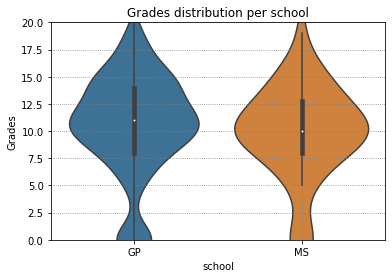

In [10]:
sns.violinplot(x='school', y='G3', data=data, saturation=0.6)
plt.title('Grades distribution per school')
plt.ylabel('Grades')
plt.ylim([0,20])
plt.grid(linestyle=':', color='grey')
plt.show()

In [11]:
from scipy.stats import ttest_ind

GP_grades = data[data['school']=='GP'].G3
MS_grades = data[data['school']=='MS'].G3

ttest, pval = ttest_ind(GP_grades, MS_grades)

if pval < 0.05:
  print('H0 rejected\nP-value = ' + str(pval))
else:
  print('H0 not rejected, we can drop the ''school'' attribute\nP-value = ' + str(pval))

H0 not rejected, we can drop the school attribute
P-value = 0.3722262371311469


In [12]:
data.drop(['school'], axis=1, inplace=True)
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [13]:
famsize_diff = data.groupby('famsize')['G3'].mean()
mean_grade_guard = data.groupby('guardian')['G3'].mean()
stud_per_gender = data.groupby('sex')['sex'].count()
print(famsize_diff), print('\n')
print(mean_grade_guard), print('\n')
print(stud_per_gender)

famsize
GT3    10.177936
LE3    11.000000
Name: G3, dtype: float64


guardian
father    10.688889
mother    10.483516
other      9.062500
Name: G3, dtype: float64


sex
F    208
M    187
Name: sex, dtype: int64


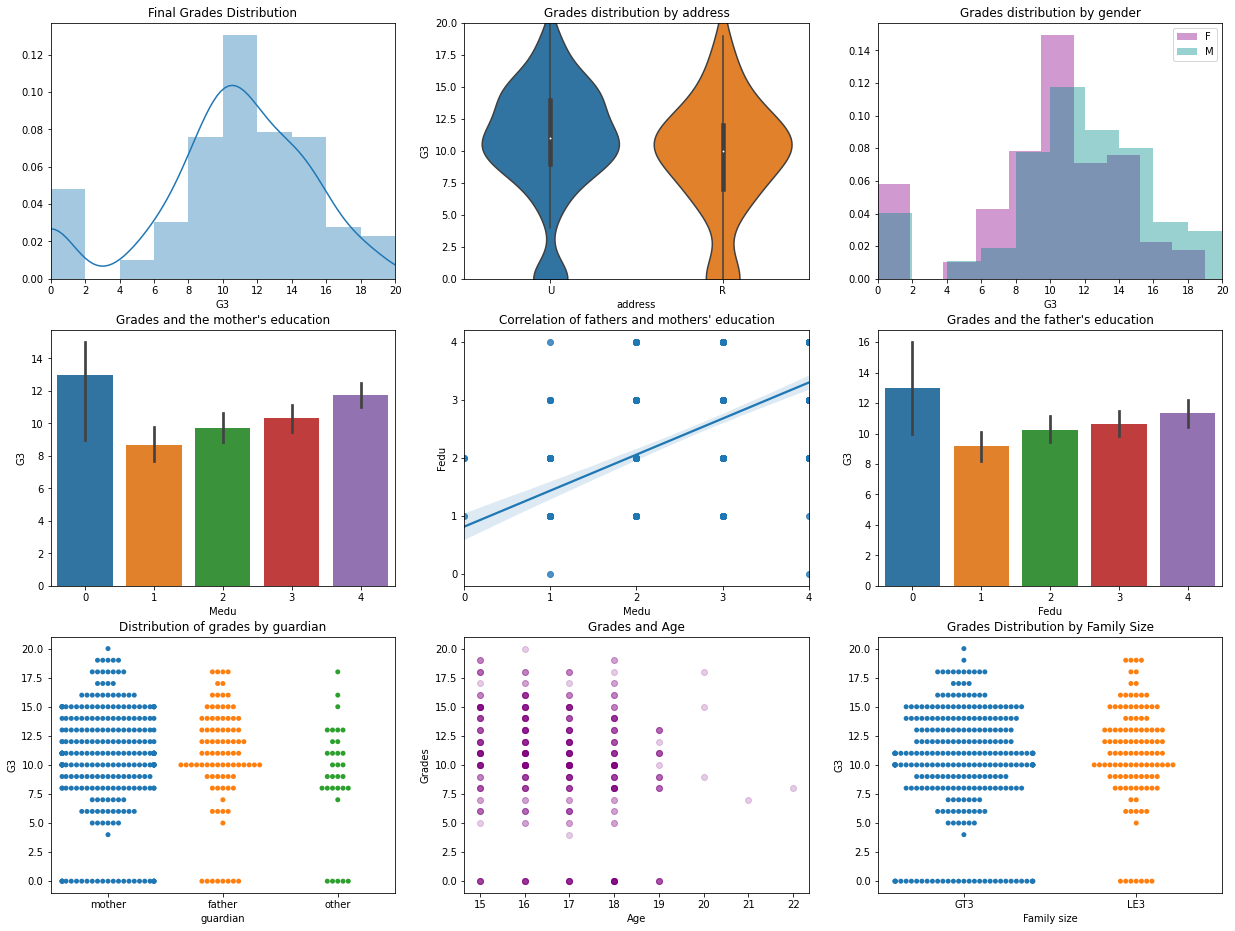

In [14]:
fig, ax = plt.subplots(3,3, figsize=(21,16))

sns.distplot(data['G3'], ax=ax[0,0], bins=10)
ax[0,0].set(title='Final Grades Distribution')
ax[0,0].set_xlim([0,20])
ax[0,0].set_xticks(range(0,21,2))

sns.violinplot(x='address', y='G3', data=data, ax=ax[0,1])
ax[0,1].set_title('Grades distribution by address')
ax[0,1].set_ylim([0,20])

sns.distplot(data[data['sex']=='F'].G3, ax=ax[0,2], bins=10, color='darkmagenta', kde=False, norm_hist=True)
sns.distplot(data[data['sex']=='M'].G3, ax=ax[0,2], bins=10, color='darkcyan', kde=False, norm_hist=True)
ax[0,2].set_title('Grades distribution by gender')
ax[0,2].legend(['F','M'])
ax[0,2].set_xlim([0,20])
ax[0,2].set_xticks(range(0,21,2))

sns.barplot(y='G3', x='Medu', data=data, ax=ax[1,0])
ax[1,0].set_title('Grades and the mother\'s education')

sns.regplot(x='Medu', y='Fedu', data=data, ax=ax[1,1])
ax[1,1].set_xticks([0,1,2,3,4])
ax[1,1].set_yticks([0,1,2,3,4])
ax[1,1].set_title('Correlation of fathers and mothers\' education')

sns.barplot(y='G3', x='Fedu', data=data, ax=ax[1,2])
ax[1,2].set_title('Grades and the father\'s education')

sns.swarmplot(x='guardian', y='G3', data=data, ax=ax[2,0])
ax[2,0].set_title('Distribution of grades by guardian')

ax[2,1].scatter(data['age'], data['G3'], alpha=0.2, c='purple')
ax[2,1].set(xlabel='Age',ylabel='Grades',title='Grades and Age')

sns.swarmplot(x='famsize', y='G3', data=data, ax = ax[2,2])
ax[2,2].set(xlabel='Family size')
ax[2,2].set(title='Grades Distribution by Family Size')

plt.show()

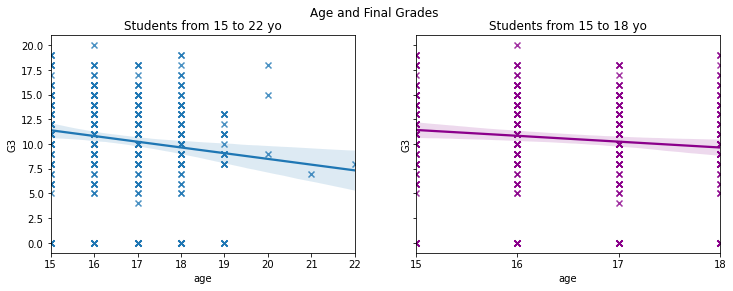


There is a negative correlation between Age and G3 and it tends to be less strong if ages 
that are atypical for high school students are not taken into account. More on this below.


In [15]:
fig, axs = plt.subplots(1,2, figsize=(12, 4), sharey=True)
plt.suptitle('Age and Final Grades')
sns.regplot(x="age", y="G3", data=data, ax = axs[0], marker='x')
axs[0].set_title('Students from 15 to 22 yo')
axs[1].set_title('Students from 15 to 18 yo')
sns.regplot(x="age", y="G3", data=data[data.age<19], ax = axs[1], marker='x',color='darkmagenta')
axs[1].set_xticks([15, 16, 17, 18])
plt.show()
print('\nThere is a negative correlation between Age and G3 and it tends to be less strong if ages \nthat are atypical for high school students are not taken into account. More on this below.')

In [16]:
corr_matrix = data.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

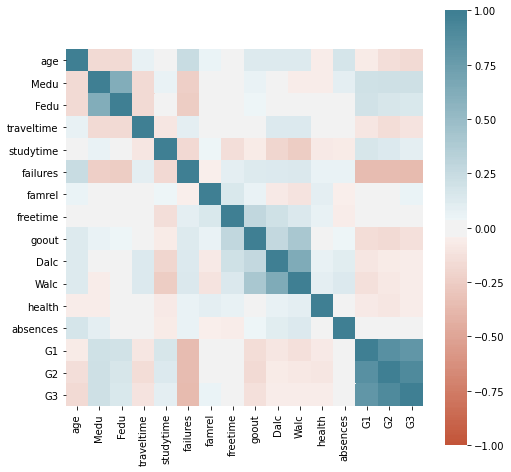

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.show()

---

* Analyzing the linear correlations among our numerical variables, it can be seen that the level of **education achieved by** the students' **parents** (especially the mother), i.e. Medu and Fedu, **has a positive correlation with grades**, which is consistent with the relevant literature on this subject (*see also: Dubow E.F., Boxer P., Huesmann L.R. Long-term effects of parents’ education on children’s educational and occupational success: mediation by family interactions, child aggression, and teenage aspirations. Merrill-Palmer Q. 2009;55(3):224–249*), although we have seen in the barplots above that students whose parents had an education score equal to zero had higher mean grades, but with a much higher variance.

* **Mothers are typically more involved in** taking care of **their children's education** compared to fathers and others kind of 'guardians'. Moreover, grades tend to be higher when the mother is the 'guardian'.

* As expected, **past grades** (G1 and G2) **are strongly correlated to** the **final exam grades** (G3).

* Poor past performances obviously display a negative correlation with higher final grades, which is probably reflected onto **the variable 'age'** as well, that **likely catches the effect attributable to** older students having to stay longer in high school because of **grade retention** (the dataset contains students as old as 22 y.o.). As a matter of facts, this negative effect tend to vanish as atypical ages (>18) are dropped.

---

Finally, as a side note (irrelevant to the final end of this project), we can highlight the strong positive correlation between the educational attainment of fathers and mothers, which is in line with the findings of the main sociological end economic studies on the topic of educational assortative mating, thus indicating that the father's education might actually be a proxy variable for the mother's (*see also Lasse Eika, Magne Mogstad, and Basit Zafar, "Educational Assortative Mating and Household Income Inequality," Journal of Political Economy 127, no. 6 (December 2019): 2795-2835.*).

However, besides educational assortative mating, another form of relationship, this time between variables rather than parents, that is highlighted by the correlation matrix is *'multicollinearity'*.

---

##Classification

In [0]:
#G3 grades are sorted into 5 classes in order to perform classification
data['grade'] = pd.cut(data['G3'], [-0.1,9,11,13,15,20], labels=['F','D','C','B','A'])

In [19]:
y = data['grade'].values
y.shape

(395,)

In [20]:
#Checking for relevant class imbalances
y.value_counts()/len(y)

F    0.329114
D    0.260759
C    0.156962
B    0.151899
A    0.101266
dtype: float64

In [21]:
X = data.drop(['G3','grade'], axis=1)
X.shape

(395, 31)

In [22]:
to_encode = []
to_normalize = []

for col in X.columns:
  if X[col].dtype == int:
    to_normalize.append(col)
  else:
    to_encode.append(col)

print(to_encode)
print(to_normalize)

['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [0]:
transformer = ColumnTransformer([
                                 ('enc', OneHotEncoder(drop='first'), to_encode),
                                 ('norm', Normalizer(), to_normalize)
])

In [0]:
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

In [26]:
#Correcting the labels of our variables after transformation
#...
cat_encoder = transformer.named_transformers_['enc']
cat_attr = list(cat_encoder.get_feature_names())
print(cat_attr)
print(to_encode)
print('\nSince the labels of the attributes resulting from encoding are not clear, they should be changed into something easily understandable.')

['x0_M', 'x1_U', 'x2_LE3', 'x3_T', 'x4_health', 'x4_other', 'x4_services', 'x4_teacher', 'x5_health', 'x5_other', 'x5_services', 'x5_teacher', 'x6_home', 'x6_other', 'x6_reputation', 'x7_mother', 'x7_other', 'x8_yes', 'x9_yes', 'x10_yes', 'x11_yes', 'x12_yes', 'x13_yes', 'x14_yes', 'x15_yes']
['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Since the labels of the attributes resulting from encoding are not clear, they should be changed into something easily understandable.


In [27]:
cat_attributes = []
for text in cat_attr:
  end = text.find('_')
  if end ==2:
    replacement = to_encode[int(text[1:2])]
    cat_attributes.append(text.replace(text[0:end],replacement))
  else:
    replacement = to_encode[int(text[1:3])]
    cat_attributes.append(text.replace(text[0:end],replacement))
print(cat_attributes)
attributes = cat_attributes + to_normalize
attributes
#...
#End of labels correction

['sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']


['sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

Quick evaluation of different classification algorithms based on accuracy:

In [0]:
nb_class = GaussianNB()
nb_class.fit(X_train_trans, y_train)
nb_pred = nb_class.predict(X_test_trans)
nb_acc = accuracy_score(y_test, nb_pred)
nb_acc

0.40336134453781514

In [0]:
knn_class = KNeighborsClassifier(n_neighbors=10)
knn_class.fit(X_train_trans, y_train)
knn_pred = knn_class.predict(X_test_trans)
knn_acc = accuracy_score(y_test, knn_pred)
knn_acc

0.3025210084033613

In [0]:
xgb_class = XGBClassifier(random_state=42)
xgb_class.fit(X_train_trans, y_train)
xgb_pred = xgb_class.predict(X_test_trans)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_acc

0.680672268907563

In [66]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_trans, y_train)
rand_f_pred = random_forest.predict(X_test_trans)
rand_f_acc = accuracy_score(y_test, rand_f_pred)
rand_f_acc

0.7142857142857143

In [0]:
train_randf_acc = accuracy_score(y_train, random_forest.predict(X_train_trans))
print('Accuracy on training set : ' + str(train_randf_acc))

Accuracy on training set : 1.0


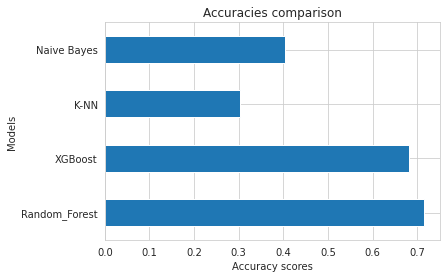

In [0]:
accuracies = pd.Series([rand_f_acc, xgb_acc, knn_acc, nb_acc], index=['Random_Forest','XGBoost', 'K-NN','Naive Bayes'])
accuracies.plot(kind='barh', title='Accuracies comparison')
plt.xlabel('Accuracy scores')
plt.ylabel('Models')
plt.show()

In [0]:
tuned_forest_class = RandomForestClassifier()

n_estimators = [int(x) for x in np.arange(45, 66, 5)]
max_depth = [int(x) for x in np.arange(2, 10, 2)]
criterion = ['gini','entropy']

random_grid = {'n_estimators': n_estimators,
               'max_depth' : max_depth,
               'criterion' : criterion
               }

rand_search = RandomizedSearchCV(tuned_forest_class, random_grid, cv=5, n_jobs=-1, random_state=42, n_iter=35)

In [152]:
rand_search.fit(X_train_trans, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [153]:
rf_best = rand_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
feature_importance = rand_search.best_estimator_.feature_importances_

relevant_features = sorted(zip(feature_importance, attributes), reverse=True)
relevant_features

[(0.2201339589489342, 'G2'),
 (0.15335588003760325, 'G1'),
 (0.10556441251309137, 'age'),
 (0.07355867009889401, 'Dalc'),
 (0.061067849366206156, 'traveltime'),
 (0.04661572202750545, 'Walc'),
 (0.044807285666354835, 'goout'),
 (0.038542425424843374, 'absences'),
 (0.0342510476437393, 'studytime'),
 (0.029229508822906983, 'famrel'),
 (0.02721556736079321, 'Fedu'),
 (0.027058725320186664, 'Medu'),
 (0.025701211001784335, 'health'),
 (0.020466990325142643, 'freetime'),
 (0.0160276679136398, 'failures'),
 (0.005913514318477983, 'guardian_mother'),
 (0.005765254482300205, 'reason_reputation'),
 (0.005166188264280603, 'sex_M'),
 (0.004550749563684982, 'famsize_LE3'),
 (0.004549698264678864, 'internet_yes'),
 (0.004504124866016181, 'romantic_yes'),
 (0.004283667956721049, 'paid_yes'),
 (0.004250615798484837, 'Fjob_services'),
 (0.0037198990914093966, 'Fjob_other'),
 (0.0035157448992339923, 'activities_yes'),
 (0.0033536500609265387, 'famsup_yes'),
 (0.0031407993649819515, 'Pstatus_T'),
 (0.0

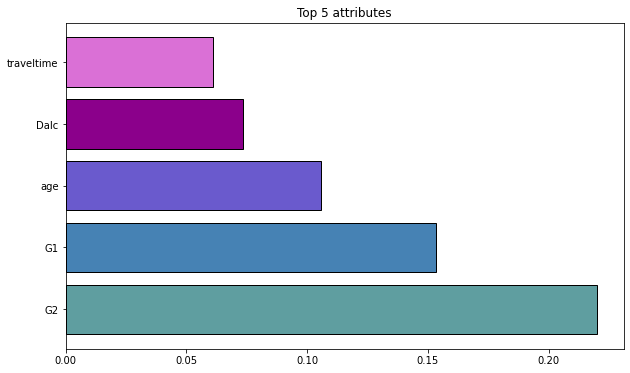

In [155]:
top5 = relevant_features[0:5]
attr = [x[1] for x in top5]
imp = [x[0] for x in top5]

plt.figure(figsize=(10,6))
plt.title('Top 5 attributes')
plt.barh(attr, imp, color=['cadetblue','steelblue','slateblue','darkmagenta','orchid'],  edgecolor='black')
plt.show()

In [156]:
rf_predictions = rand_search.predict(X_test_trans)
rf_acc = accuracy_score(y_test, rf_predictions)
rf_acc

0.7478991596638656

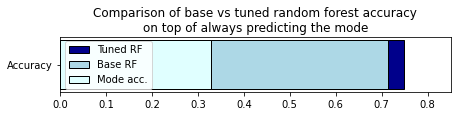

In [157]:
base_accuracy = accuracy_score(y_test, np.ones_like(y_test)*stats.mode(y_test)[0][0])
comparison_acc = 'Accuracy'
plt.figure(figsize=(7,1))
plt.barh(comparison_acc, rf_acc,color='darkblue', edgecolor='black')
plt.barh(comparison_acc, rand_f_acc, color='lightblue', edgecolor='black')
plt.barh(comparison_acc, base_accuracy, color='lightcyan', edgecolor='black')
plt.xlim([0,0.85])
plt.title('Comparison of base vs tuned random forest accuracy\non top of always predicting the mode')
plt.legend(['Tuned RF','Base RF','Mode acc.'], loc='center left')
plt.show()

Although the tuned random forest performs slightly better, the more basic random forest still provides comparable results

In [0]:
def get_grade_share(to_count, checker=None, wrong_predictions=True):
  '''get_grade_share counts how many times a grade appears in the array to_count. 
  Checker is a second array to be matched with to_count. 
  If checker is not None, the first number in the returned list indicates how many times a grade in a given position in to_count is not a perfect match for the grade in the same position in checker. 
  If there is no checker and you still want to return a list of 6 elemnts instead of 5 wrong_predictions should be set to True, thus the first number in the returned 6-elements list is a 0.'''
  grades = ['A','B','C','D','F']
  if checker is None:
    if wrong_predictions==True:
      grades_sum = [0]
    else:
      grades_sum = []
    for grade in grades:
      sum = 0
      for x in to_count:
        if x == grade:
          sum += 1
      grades_sum.append(sum)
  else:
    sum = 0
    check = []
    for i in np.arange(0,len(to_count),1):
      if to_count[i] != checker[i]:
        sum += 1
      else:
        check.append(to_count[i])
    grades_sum = [sum]
    for grade in grades:
      sum_c = 0
      for c in check:
        if grade == c:
          sum_c += 1
      grades_sum.append(sum_c)
  return grades_sum

In [159]:
predictions = get_grade_share(rf_predictions[-15:], y_test[-15:])
predictions_dict = dict(zip(['!=','A','B','C','D','F'], predictions)) 
print('Correct predictions on the last {} elements in the test set:'.format(sum(predictions)))
print(predictions_dict)

Correct predictions on the last 15 elements in the test set:
{'!=': 4, 'A': 1, 'B': 4, 'C': 1, 'D': 2, 'F': 3}


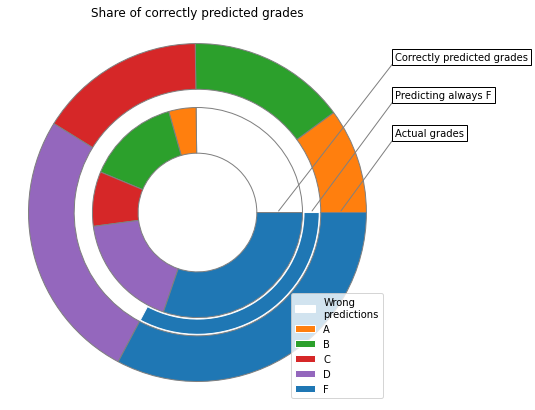

In [160]:
fig, ax = plt.subplots(figsize=(7,7))

length = len(y_test)
cmap = plt.get_cmap("tab10")
colors = cmap(range(6))
colors[0] = [1,1,1,1]
colors[-1] = cmap(0)

ax.pie(get_grade_share(np.ones_like(y_test[-length:])*'F',y_test[-length:]), radius=0.8,colors=colors, wedgeprops=dict(width=0.1, edgecolor='w'))
ax.pie(get_grade_share(rf_predictions[-length:], y_test[-length:]), radius=0.69, colors=colors, wedgeprops=dict(width=0.3, edgecolor='grey'))
ax.pie(get_grade_share(y_test[-length:]), radius=1.11, colors=colors, wedgeprops=dict(width=0.3, edgecolor='grey'))
ax.legend(['Wrong\npredictions','A','B','C','D','F'], loc='lower right')
ax.set(aspect="equal", title='Share of correctly predicted grades')
ax.annotate('', xy=(0.525,0), xytext=(1.3,1), arrowprops=dict(arrowstyle="-", color='grey'))
ax.annotate('', xy=(0.745,0), xytext=(1.3,0.75), arrowprops=dict(arrowstyle="-", color='grey'))
ax.annotate('', xy=(0.935,0), xytext=(1.3,0.5), arrowprops=dict(arrowstyle="-", color='grey'))
ax.annotate('Correctly predicted grades', xy=(0.525,0), xytext=(1.3,1), bbox=dict(boxstyle="square", fc='w', ec='black'))
ax.annotate('Predicting always F', xy=(0.745,0), xytext=(1.3,0.75), bbox=dict(boxstyle="square", fc='w', ec='black'))
ax.annotate('Actual grades', xy=(0.935,0), xytext=(1.3,0.5), bbox=dict(boxstyle="square", fc='w', ec='black'))
plt.show()

#Regression

In [0]:
#Redefinition of the dependent variable before performing regression
yr = data['G3'].values
yr.shape

(395,)

In [0]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X,yr, test_size=0.3, random_state=42)

In [0]:
Xr_train_trans = transformer.fit_transform(Xr_train)
Xr_test_trans = transformer.transform(Xr_test)

Quick evaluation of different regression algorithms based on RMSE:

In [0]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(Xr_train_trans, yr_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print('Attributes selected by LASSO:')
list(np.array(attributes)[lasso_reg.sparse_coef_.indices])

Attributes selected by LASSO:


['sex_M',
 'address_U',
 'famsize_LE3',
 'Mjob_services',
 'Fjob_other',
 'Fjob_services',
 'reason_home',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'famsup_yes',
 'activities_yes',
 'nursery_yes',
 'internet_yes',
 'romantic_yes',
 'age',
 'Fedu',
 'absences',
 'G1',
 'G2']

In [0]:
lasso_pred = lasso_reg.predict(Xr_test_trans)
lasso_rmse = MSE(yr_test, lasso_pred)**0.5
lasso_rmse

2.200268353483738

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(Xr_train_trans, yr_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
display(sorted(zip(lin_reg.coef_,attributes), reverse=True))
print('\n ('+str(lin_reg.intercept_)+', \'intercept\')')

[(21.493236678296686, 'G2'),
 (13.132259622171397, 'G1'),
 (8.799147298190887, 'famrel'),
 (8.29479336882827, 'goout'),
 (4.332199476135237, 'absences'),
 (0.5256338781910829, 'Mjob_teacher'),
 (0.4008284423573147, 'guardian_other'),
 (0.25444610754670616, 'sex_M'),
 (0.24543733899400355, 'Mjob_services'),
 (0.23875161015395346, 'famsup_yes'),
 (0.23111178732822454, 'Mjob_health'),
 (0.21116552402388497, 'guardian_mother'),
 (0.1603243786182941, 'Mjob_other'),
 (0.15708062730702213, 'reason_other'),
 (0.144950181178833, 'schoolsup_yes'),
 (0.1260440654939359, 'Fjob_teacher'),
 (0.07259904093431169, 'Fjob_health'),
 (0.0667048103287822, 'paid_yes'),
 (0.04215455505711194, 'Fjob_other'),
 (-0.08106918268206233, 'higher_yes'),
 (-0.1320349174490228, 'internet_yes'),
 (-0.1814549588563758, 'famsize_LE3'),
 (-0.20849508582845455, 'Fjob_services'),
 (-0.22429612954611303, 'romantic_yes'),
 (-0.2503649215833225, 'address_U'),
 (-0.26743162369873413, 'Pstatus_T'),
 (-0.26977076985134546, 'nurs


 (5.324026051442755, 'intercept')


In [0]:
lin_pred = lin_reg.predict(Xr_test_trans)
lin_rmse = MSE(yr_test, lin_pred)**0.5
lin_rmse

2.3542808572917644

In [0]:
xgb_reg = XGBRegressor(objective ='reg:squarederror')
xgb_reg.fit(Xr_train_trans, yr_train)
xgb_pred = xgb_reg.predict(Xr_test_trans)
xgb_rmse = MSE(yr_test, xgb_pred)**0.5
xgb_rmse

1.8880727551701788

In [0]:
random_forest = RandomForestRegressor()
random_forest.fit(Xr_train_trans, yr_train)
rand_f_pred = random_forest.predict(Xr_test_trans)
rand_f_rmse = MSE(yr_test, rand_f_pred)**0.5
rand_f_rmse

1.8082418686288027

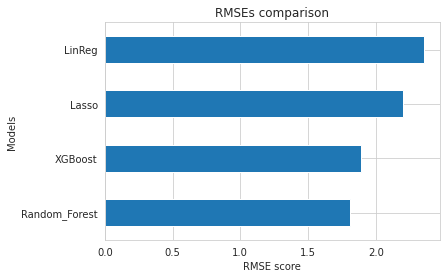

In [0]:
maes = pd.Series([rand_f_rmse, xgb_rmse, lasso_rmse, lin_rmse], index=['Random_Forest','XGBoost', 'Lasso','LinReg'])
maes.plot(kind='barh', title='RMSEs comparison')
plt.xlabel('RMSE score')
plt.ylabel('Models')
plt.show()

In [0]:
tuned_forest_reg = RandomForestRegressor()

n_estimators = [int(x) for x in np.arange(30, 40, 1)]
max_depth = [int(x) for x in np.arange(5, 10, 1)]

random_grid = {'n_estimators': n_estimators,
               'max_depth' : max_depth
               }

reg_rsearch = RandomizedSearchCV(tuned_forest_reg, random_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)

In [0]:
reg_rsearch.fit(Xr_train_trans, yr_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
rf_reg_best = reg_rsearch.best_estimator_
rf_reg_best

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=38, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
reg_feature_importance = rf_reg_best.feature_importances_

reg_relevant_features = sorted(zip(reg_feature_importance, attributes), reverse=True)
reg_relevant_features

[(0.42306498395847925, 'age'),
 (0.34311826325723427, 'G2'),
 (0.08836482026410826, 'absences'),
 (0.029385838181660687, 'G1'),
 (0.017733370608318966, 'Dalc'),
 (0.015809307467838648, 'Fedu'),
 (0.011297650573399695, 'traveltime'),
 (0.010301677194189363, 'freetime'),
 (0.008469135264492422, 'famrel'),
 (0.007960971379816727, 'studytime'),
 (0.007472993394536, 'goout'),
 (0.006697224959890372, 'health'),
 (0.005533338205668352, 'Walc'),
 (0.004601214220838242, 'reason_home'),
 (0.004058519943660847, 'Medu'),
 (0.0034163286859191684, 'schoolsup_yes'),
 (0.0019844970365791837, 'failures'),
 (0.0013834283595122606, 'Fjob_services'),
 (0.0013731052096397816, 'romantic_yes'),
 (0.0009559081507310017, 'Mjob_services'),
 (0.0008321210016450605, 'Mjob_teacher'),
 (0.0007104361867319522, 'reason_other'),
 (0.0006118905269006665, 'Fjob_health'),
 (0.0006073346118617583, 'Mjob_other'),
 (0.0006022935962581924, 'famsize_LE3'),
 (0.0005928287256278514, 'guardian_mother'),
 (0.0004135721341316792, 

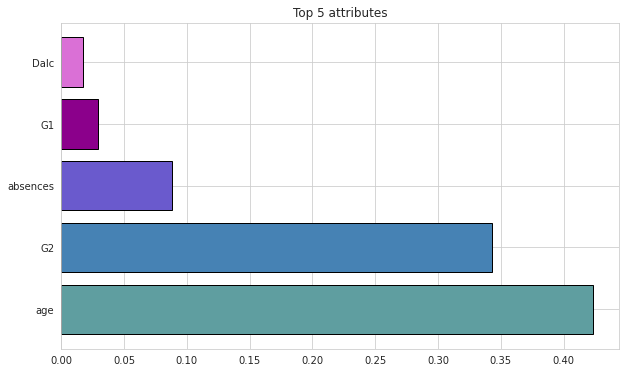

In [0]:
top5 = reg_relevant_features[0:5]
reg_attr = [x[1] for x in top5]
reg_imp = [x[0] for x in top5]

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.title('Top 5 attributes')
plt.barh(reg_attr, reg_imp, color=['cadetblue','steelblue','slateblue','darkmagenta','orchid'],  edgecolor='black')
plt.show()

In [0]:
rf_reg_predictions = reg_rsearch.predict(Xr_test_trans)
rf_rmse = MSE(yr_test, rf_reg_predictions)**0.5
rf_rmse

1.784393937585789

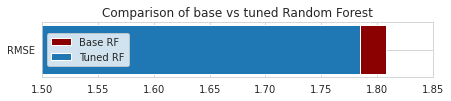

In [0]:
comparison_rmse = 'RMSE'
plt.figure(figsize=(7,1))
plt.barh(comparison_rmse, rand_f_rmse,color='darkred')
plt.barh(comparison_rmse, rf_rmse)
plt.xlim(1.5, 1.85)
plt.title('Comparison of base vs tuned Random Forest')
plt.legend(['Base RF','Tuned RF'], loc='center left')
plt.show()

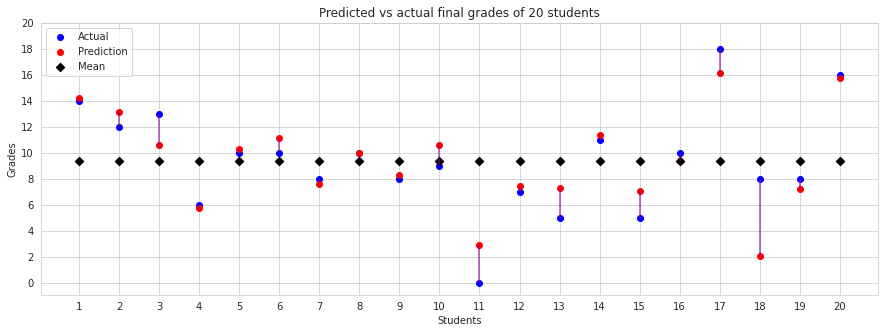

In [0]:
num_to_viz = 20
plt.figure(figsize=(15,5))
plt.scatter(y=yr_test[-num_to_viz:], x=[x for x in range(num_to_viz)], c='b')
plt.scatter(y=rf_reg_predictions[-num_to_viz:], x=[x for x in range(num_to_viz)], c='r')
plt.scatter(y=np.zeros_like(yr_test[-num_to_viz:]) + np.mean(yr_test[-num_to_viz:]), x=[x for x in range(num_to_viz)], c='black', marker='D')
plt.vlines(x=[x for x in range(num_to_viz)], ymin=rf_reg_predictions[-num_to_viz:], ymax=yr_test[-num_to_viz:], color='darkmagenta', alpha=0.7)
plt.legend(['Actual', 'Prediction', 'Mean'])
plt.xticks(np.arange(0,num_to_viz,step=1), labels=[str(x) for x in np.arange(1,num_to_viz+1,1)])
plt.ylabel('Grades')
plt.xlabel('Students')
plt.yticks(range(0,21,2))
plt.title('Predicted vs actual final grades of {} students'.format(num_to_viz))
plt.show()

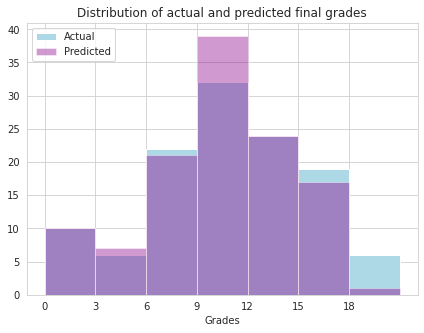

In [0]:
plt.figure(figsize=(7,5))
plt.title('Distribution of actual and predicted final grades')
plt.xlabel('Grades')
plt.hist(yr_test, color='lightblue', bins=[0,3,6,9,12,15,18,21])
plt.hist(rf_reg_predictions, color='darkmagenta', bins=[0,3,6,9,12,15,18,21], alpha=0.4)
plt.legend(['Actual','Predicted'], loc='upper left')
plt.xticks([0,3,6,9,12,15,18])
plt.show()